***

# Machine Learning & Statistics Assessment - Scipy-Stats

***



<br></br>

For this assessment we will be looking at the Python library SciPy and specifically the module SciPy-Stats. The aim of this notebook is to provide a clear and concise overview of the Python package SciPy-Stats and an example hypothesis test using ANOVA. This will be achieved by reseaching the package and demonstrating it's functionality through using a data set for which using ANOVA is suitable.

<br></br>

![img](images/scipy_logo.png)

<br></br>

***

### SciPy

***

[SciPy Documentation](https://docs.scipy.org/doc/scipy/index.html)

Developed in 2001 as a result of Travis Oliphant, Eric Jones, and Pearu Peterson merging code, Scientific Python (SciPy) is an open source Python package used to solve scientific and mathematical problems [1]. SciPy is an open source library which is built on Numpy and competes with MATLAB, Octave, R-Lab, etc. [2]. 

It provides users with mathematical algorithms and user-friendly high level tools to manipulate and visualise data [3]. Deploying these high level tools helps us better analyse data, reduces the complexity of code and helps “...solve problems like numerical integration, interpolation, optimization, linear algebra and statistics” [4].


<br>

### What Is Scipy-Stats?

***
[Documentation for Scipy-Stats](https://docs.scipy.org/doc/scipy/reference/stats.html)

For this assessment we will be focusing on scipy.stats.

scipy.stats is a module contained within the SciPy library which contains the statistical functions for the package [5]. The module is home to a vast selection of statistical functions,  probability distributions, kernel density estimation, quasi-Monte Carlo functionality, and much more  [6].
SciPy-Stats is able to generate discrete or continuous random numbers as well as other descriptive statistical values [7].

scipy.stats can work with both discrete or continuous variables [5]. Quantitative/Numerical data, is data which deals with objective measurements. e.g. height. It is data which can be counted. Quantitative data can be broken down into discrete data. This is data which is represented in whole numbers e.g. how many people are in the crowd. Continuous data is data which can take any value within a range e.g. a person height can be any value within the range of human heights [8].


- A distribution of discrete variables is represented by Probability Mass Functions (PMF) and Cumulative Distribution Functions (CDF). 
     - PMF defines the probability of all possible values x for the random variable. 
     - CDF is the probability that the random variable X has an outcome less or equal to the value x
- A distribution of continuous variables  is represented by Probability Density Functions (PDF) and Cumulative Distribution Functions (CDF) [9].
     - PDF defines the probability of all possible values x for continuous values. 
     - CDF is the probability that the random variable X has an outcome less or equal to the value x [9].
    


<br>

<br>

##### Advantages of scipy.stats:

- Efficent, poweful and fast.
- Open source.
- Classes, and web and database routines for parallel programming.
- Provides high level functions and classes for manipualting and visualising data [7]. 


<br>

scipy.stats can be broken into:

- Distributions
- Descriptive Statistics
- T-Test
- T-Score

<br>

<br>

#### Importing Libaries

<br>

In [37]:
# Importing scipy-stats
from scipy import stats

# To work with data
import numpy as np

# To work with data
import pandas as pd

# Visualising data
import matplotlib.pyplot as plt

# Configures matplotlib to show figures embedded in the notebook. 
%matplotlib inline

# Visualising data
import seaborn as sns

# Collections.
import collections as co

# Specials.
import scipy.special as spec

<br>

In [38]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Selecting a colour scheme.
plt.style.use('ggplot')

<br>

In [39]:
# Setting the PRNG as PCG-64
rng = np.random.default_rng()

<br>

<br>

### Classes

SciPy Stats consists of three classes: **

- rv_continuous
- rv_discrete
- rv_histogram

** rv stands for random variables

<br>

<br>

#### rv_continuous

[Documentation for rv_continuous](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous)

This is a continuous random variable class meant fo subclassing. rv_continuous can't be used itself as a distribution [10] It is "...a base class to construct specific distribution classes and instances for continuous random variables" [11].

In scipy.stats, distributions are instances, when we use rv_continuous an instance is created [12]. When an instance is created, we now have a functional distribution "... with all relevant methods automagically generated by the framework" [12].

rv_continuous is used when a distribution needed is not defined in scipy.stats [12]. 


<br>

In [41]:
# Setting seed so output stays the same
rng = np.random.default_rng(seed=5)

# Generating a normal distribution 
x = rng.normal(loc=0, scale=1.0, size=5000)

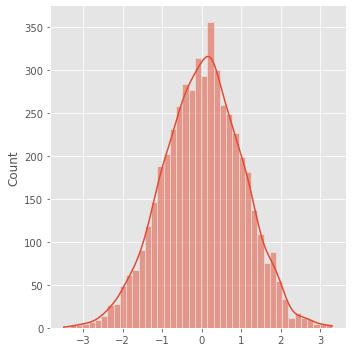

In [42]:
# Generating a distplot
sns.displot(x, bins='auto', kde=True)

<br>

<br>

Normal distribution, also known as the Gaussian distribution,is a probability function used in statistics that tells about how the data values are distributed. It usually resembles a bell shaped curve. It is the most important probability distribution function used in statistics because of its advantages in real case scenarios. The normal distribution describes a common occurring distribution of samples influenced by a large or tiny, random distribution or which occurs often in nature [13]. For example, the height of the population. The normal distribution is symmetric about the mean i.e. showing that data near the mean are more frequent in occurrence than data far from the mean e.g. people are more likely to be in and around the average height than they are to be on the smaller or taller side.

<br>

##### Fitting 

scipy.stats allows us to to fit a distribution to data. 

In [9]:
# Fitting normal distribution
location, scale = stats.norm.fit(x)

In [10]:
location, scale

(1.4210854715202004e-16, 5.8901508937395155)

<br>

<br>

<br>

#### rv_discrete 

[Documentation for rv_discrete](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html)

The scipy documentaion describes it as "...a base class to construct specific distribution classes and instances for discrete random variables. It can also be used to construct an arbitrary distribution defined by a list of support points and corresponding probabilities". 

<br>

In [43]:
# Setting seed so output stays the same
rng = np.random.default_rng(seed=5)

# Uniform distribution of random numbres
x = rng.uniform(1,10, 100000)

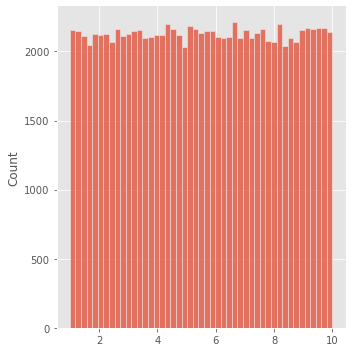

In [36]:
# Generating a displot
sns.displot(x)

<br>

As you can see from the above plot, it mimics a rectangular shape. This is the calling card of a A uniform distribution. We are almost as equally likely to get a number 1 - 10 as another.

<br>

<br>

#### rv_histogram

[Documentation for rv_histogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_histogram.html)

Generates a histogram based on a given distribution.  [Below code is taken from here](https://scipy-lectures.org/intro/scipy/auto_examples/plot_normal_distribution.html)

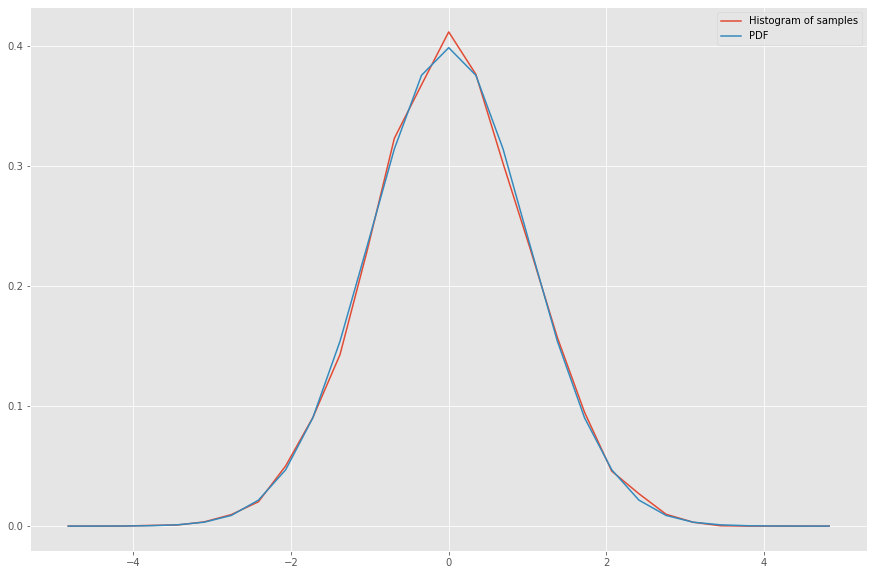

In [47]:
# Sample from a normal distribution
samples = rng.normal(size=10000)

# Generating a histogram of the sample
bins = np.linspace(-5, 5, 30)
histogram, bins = np.histogram(samples, bins=bins, density=True)

bin_centers = 0.5*(bins[1:] + bins[:-1])

# Compute the PDF on the bin centers from scipy distribution object
pdf = stats.norm.pdf(bin_centers)

# Plotting both plots
plt.plot(bin_centers, histogram, label="Histogram of samples")
plt.plot(bin_centers, pdf, label="PDF")

# Adding a legend
plt.legend()

<br>

<br>

### Representions Of Distributions
***

<br>

##### Probability density function (PDF)

PDF is the likelihood of which a variable takes a specific value. Values which have a high PDF are more likely to happen. For example; the Gaussian bell in a normal distribution.

<br>

In [11]:
# Generating 1D array of equally spaced values 
x = np.linspace(-10, 10, 50) # start, stop, size

In [12]:
x

array([-10.        ,  -9.59183673,  -9.18367347,  -8.7755102 ,
        -8.36734694,  -7.95918367,  -7.55102041,  -7.14285714,
        -6.73469388,  -6.32653061,  -5.91836735,  -5.51020408,
        -5.10204082,  -4.69387755,  -4.28571429,  -3.87755102,
        -3.46938776,  -3.06122449,  -2.65306122,  -2.24489796,
        -1.83673469,  -1.42857143,  -1.02040816,  -0.6122449 ,
        -0.20408163,   0.20408163,   0.6122449 ,   1.02040816,
         1.42857143,   1.83673469,   2.24489796,   2.65306122,
         3.06122449,   3.46938776,   3.87755102,   4.28571429,
         4.69387755,   5.10204082,   5.51020408,   5.91836735,
         6.32653061,   6.73469388,   7.14285714,   7.55102041,
         7.95918367,   8.36734694,   8.7755102 ,   9.18367347,
         9.59183673,  10.        ])

<br>

<br>

In [13]:
# Generating PDF
pdf = stats.norm.pdf(x)

Text(0, 0.5, 'PDF')

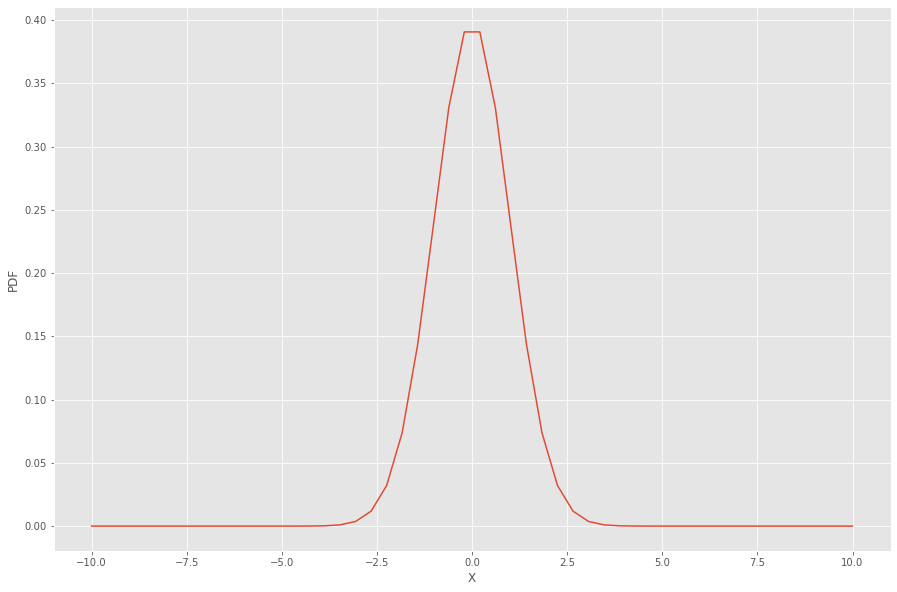

In [14]:
# Generating a plot
plt.plot(x, pdf)

# Labelling x and y axis
plt.xlabel('X')
plt.ylabel('PDF')

<br>

As we can see from the above plot, the data recreates the gaussian bell

<br>

<br>

##### Cumulative distribution function (CDF)

This is the probability that a variable takes a value less than or equal to X [15].


<br>

In [19]:
# Generating CDF using x
cdf = stats.norm.cdf(x, loc=location, scale=scale)

Text(0, 0.5, 'Probability')

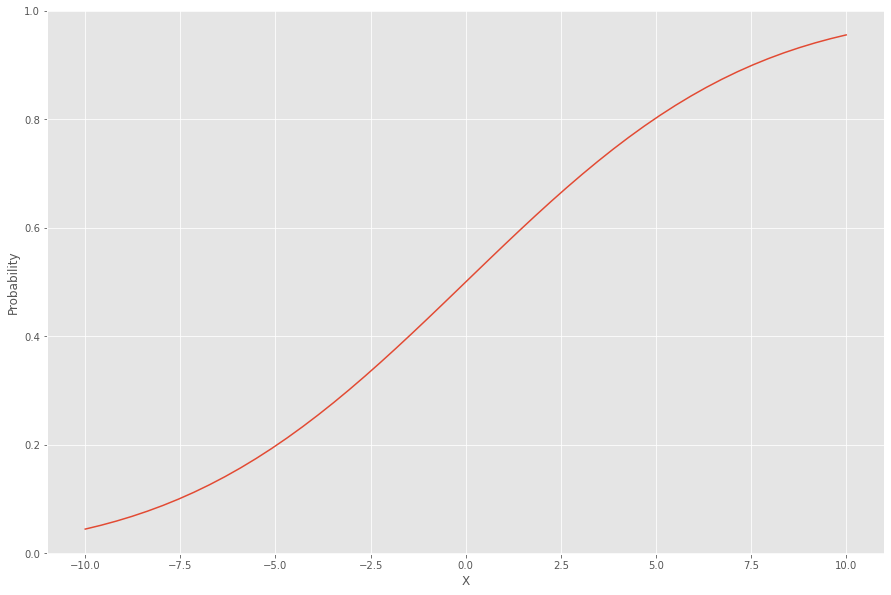

In [20]:
# Generating a plt
plt.plot(x, cdf)

# Labelling x and y axis
plt.xlabel('X')
plt.ylabel('Probability')

<br>

As we can see in the abpve plot, the x axis is "...the allowable domain for the given probability function" [15]. The y axis (probability) must fall between0 and 1. 

<br>

<br>

##### Percent Point Function (PPF)

PPF also known as he inverse distribution function, is the inverse of CDF. We use PPF to calculated the value of X for a given CDF value [15].

<br>

In [24]:
# Generating 10000 equally spaced numbers between 0 and 1
inverse =  np.linspace(0, 1, 10000)

<br>

In [26]:
# Generating PPF
x = stats.norm.ppf(inverse , loc=location, scale=scale)

Text(0, 0.5, 'CDF = P(x<=X)')

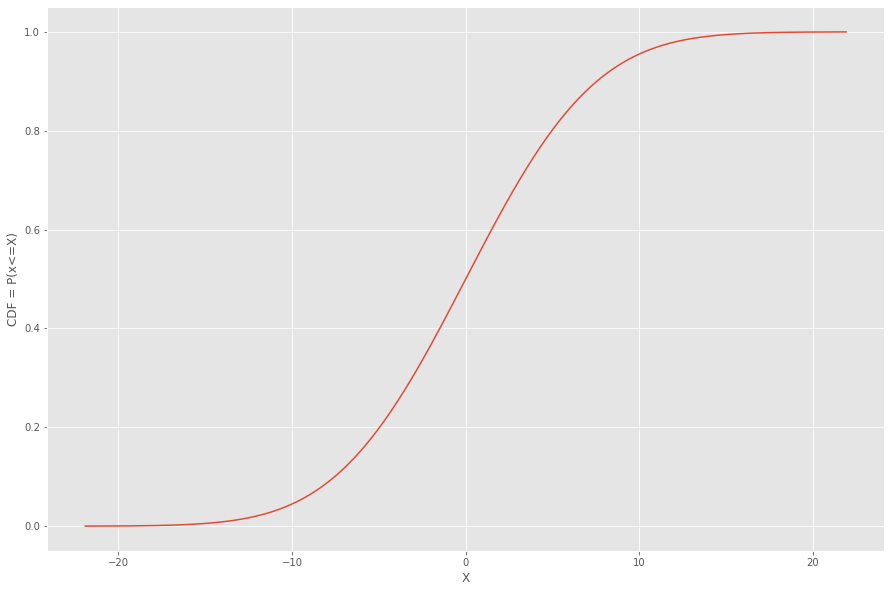

In [27]:
# Generating a plot
plt.plot(x, inverse)

# Labelling x and y axis
plt.xlabel('X')
plt.ylabel('CDF = P(x<=X)')

<br>

<br>

##### Probability Mass Function (PMF)

PMF is the probability to which a random variable will take on a particular value [16].

A binomial distribution derived from Bernoulli Process, can be thought of as probability of a success or failure outcome in an experiment which is repeated numerous times. The binomial distribution assumes that each experinment/event is independant of each other and that only two outcomes came occur, hence the word bi [17]. An example would be flipping a coin. The result can only be heads or tails, the chance of either appear is even.

![img](images/coin.jpg)

<br>

In [28]:
from scipy.stats import binom

<br>

In [29]:
# Probability of getting heads 5 times after throwning a coin 10 times
pmf = binom.pmf(k=5, p=0.5, n=10)

In [30]:
pmf

0.24609375000000003

<br>

<br>

We can skew the probaility to be in our favour. 

If the probability of success is less than 0.5, the distribution is positively skewed i.e. the probabilities for x is greater for values below the expected value than above it.

And if the probability of success is greater than 0.5, the distribution is negatively skewed — i.e. probabilities for X are greater for values above the expected value than below it [18].

<br>

<br>

In [31]:
# Probability of getting heads 50 times after throwning a coin 100 times with skewed probaility 
neg_skew = binom.pmf(k=50, p=0.3, n=100)

In [32]:
neg_skew

1.302622713144528e-05

<br>

<br>

In [33]:
# Probability of getting heads 70 times after throwning a coin 100 times with skewed probaility 
pos_skew =  binom.pmf(k=70, p=0.7, n=100)

In [34]:
pos_skew

0.0867838647534282

<br>

<br>

<br>

***

### Descriptive Statistics

***


<br>

Descriptive Statistics refers to basic stats about the data such as min, max, mean, mode, variance, etc.  Below we will show some examples using scipy.stats, a full list of statistics can be found in the SciPy Stats documentation.

<br>

#### Summary statistics

<br>

In [35]:
# A 1D array of 5 random intergrs between 0 (low) and 10 (exculsive).
x = rng.integers(0, 50, 20)

In [36]:
x

array([44, 21,  8, 31, 12,  6, 48, 27, 32,  9, 42, 31, 19, 48, 38,  5, 36,
       43, 39, 23], dtype=int64)

<br>

<br>

In [37]:
# Displays several data stats
stats.describe(x)

DescribeResult(nobs=20, minmax=(5, 48), mean=28.1, variance=209.56842105263155, skewness=-0.2667459235563513, kurtosis=-1.2478041501004968)

- Kurtosis: This is how heavily the tails of a distribution differ from those of a normal distribution i.e. if the tails have extreme values [19]. 
- Variance: The spread of numbers in a data set.
- Skewness: This is measure of the symmetry of a distribution.

<br>

<br>

In [38]:
# Finding mode
stats.mode(x)

ModeResult(mode=array([31], dtype=int64), count=array([2]))

The mode refers to the number which appears most frequently [20]. 

<br>

<br>

In [39]:
# Finding standard error of the mean
stats.sem(x)

3.2370389328260445

Standard error of a mean tells how accurate the mean of any given sample is compared to the true population mean. When the standard error increases, i.e. the means are more spread out, the mean is not accurate of the true population [21].

<br>

<br>

In [40]:
# Finding nterquartile range (IQR)
stats.iqr(x, axis=0)

22.5

<br>

<br>

IQR is the difference between the 75% and 25% percentile of the data [22]

In [41]:
# Finding z score
stats.zscore(x)

array([ 1.12686633, -0.50319188, -1.42452913,  0.20552908, -1.14104074,
       -1.56627332,  1.41035471, -0.07795931,  0.27640117, -1.35365703,
        0.98512213,  0.20552908, -0.64493607,  1.41035471,  0.70163375,
       -1.63714542,  0.55988956,  1.05599423,  0.77250585, -0.36144769])

<br>

A z-score tells you how far from the mean a data point is. It is measured in standard deviation units [23].

<br>

<br>

#### Frequency statistics

<br>

In [42]:
# Finding cumulative frequency 
stats.cumfreq(x)

CumfreqResult(cumcount=array([ 2.,  5.,  5.,  7.,  8., 11., 13., 15., 18., 20.]), lowerlimit=2.611111111111111, binsize=4.777777777777777, extrapoints=0)

Cumulative frequency is "...the sum of the class and all classes below it in a frequency distribution" [24]. i.e. adding up a value and all of the values that came before it.

<br>

<br>

In [43]:
# Finding percentile of score
stats.percentileofscore(x, 20)

30.0

<br>

In [44]:
stats.percentileofscore(x, 45)

90.0

This function helps calculate the "...percentile rank of a score relative to a list of scores" [25]. In the example above 40% of the scores is below X and 95% in the second example. 

<br>

<br>

In [45]:
# Finding the score at percentile
stats.scoreatpercentile(x, 50) # 50 i.e.median

31.0

This function calculates the score at a given percentile [26].

<br>

<br>

In [46]:
# Finding the relative frequency
stats.relfreq(x)

RelfreqResult(frequency=array([0.1 , 0.15, 0.  , 0.1 , 0.05, 0.15, 0.1 , 0.1 , 0.15, 0.1 ]), lowerlimit=2.611111111111111, binsize=4.777777777777777, extrapoints=0)

Relative frequency is the % or ratio of the number of times a value in the data occurs "...in the set of all outcomes to the total number of outcomes" [27].

<br>

<br>

In [47]:
# Generating an array of 5 intergers
binned = rng.integers(0,50,5)

In [48]:
binned

array([ 4, 16, 17,  7, 36], dtype=int64)

<br>

In [49]:
# Getting binned statistics
stats.binned_statistic(binned, np.arange(5), statistic='median', bins=2)


BinnedStatisticResult(statistic=array([1.5, 4. ]), bin_edges=array([ 4., 20., 36.]), binnumber=array([1, 1, 1, 1, 2], dtype=int64))

<br>

This function calculates binned statsistics for your data. This inculdes; the sum, median, mean, count, etc. for vaules in each bin [28].

- bin edges: number of va;ues in a bin 
- bin number: Indices of the bins in which each value of x belongs [29].

<br>

<br>

<br>

***

## T-Test

***

<br>

<br>

A T-Test is used to find if there is a significant difference between the mean of two arrays or groups which may be related in certain features [30].

<br></br>

T-Tests are used as a hypothesis testing tool [31]. To calculate the T-Test we need:
- The difference between  mean values from each data set.
- The standard deviation of each group.
- The number of data values of each. [31]

<br></br>

Depending on the type of analysis and data, different T-Tests can be used.

<br>

![img](images/t-test.png)

<br>

<br>

<br>

![img](images/p_value.webp)

#### One Sample T-Test


<br>

In this test, the test variable’s mean (random sample from the population) is compared against a hypothesised value of the population mean. The hypothesised value can be taken from trusted sources such as; industry standards, lit review, legal requisites, etc. [32]

A One Sample T-Test can only be used to compare a single sample mean to a defined constant. i.e. it cannot be used to compare means between two or more groups [33]. 


<br>

##### Assumptions
- Dependent variables have a normal distribution (approx.)
- Observations are independent from each other 
- Sample is random [32]


<br>

##### Hypotheses

- Null hypothesis: Sample mean = hypothesised mean.
- Alternative hypothesis: Sample mean != hypothesised mean (two-tailed or two-sided).
- Alternative hypothesis: Sample mean < or > to hypothesised mean (one-tailed or one-sided) [33].


<br>

![img](images/t-test_one.png)

<br>

<br>

<br>

![img](images/t-test_one_equation.jpg)

- μ0 = The test value -- the proposed constant for the population mean
- x¯ = Sample mean
- n = Sample size (i.e., number of observations)
- s = Sample standard deviation
- sx¯ = Estimated standard error of the mean (s/sqrt(n))


<br>

<br>


If the calculated t value > critical t value, then the null hypothesis is rejected [33]. 

Using scipy.stats let's put this into practice. 

Let's suppose a teacher wants her class to score at least 60% on their exam. By taken a random sample of 6 students let's see how confident she can be of the result.

<br>

<br>

In [118]:
# Setting seed so output stays the same
rng = np.random.default_rng(seed=0)

# Generating an array of 6 integers 
grades = rng.integers(40, 100, 6)

In [119]:
grades

array([91, 78, 70, 56, 58, 42], dtype=int64)

<br>

<br>

<AxesSubplot:ylabel='Density'>

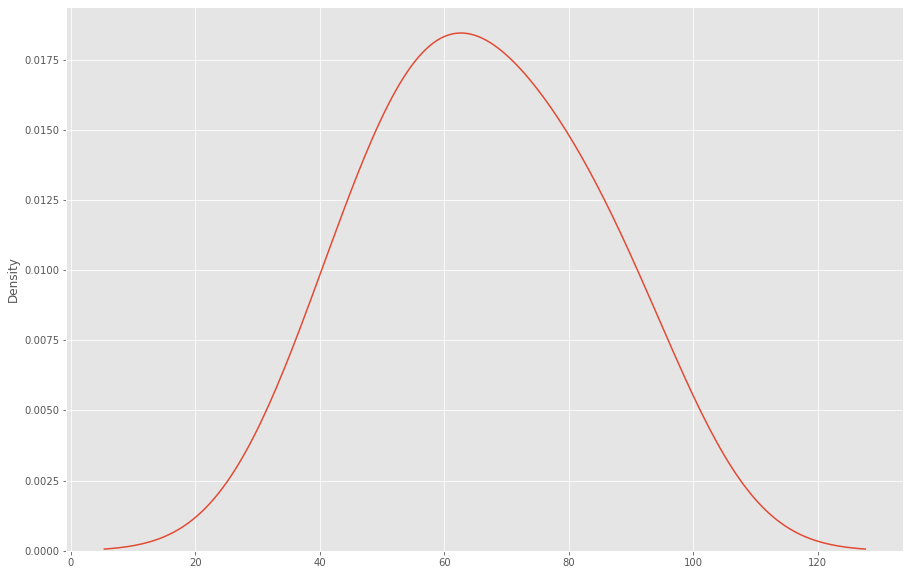

In [120]:
# Generating a kdeplot
sns.kdeplot(grades)

<br>

we can see that our sample follows a normal distribution - bell shaped. 

<br>

In [121]:
#t-Test, hypotitis mean
stats.ttest_1samp(grades, 60)

Ttest_1sampResult(statistic=0.818212731171209, pvalue=0.4504546683385968)

<br>

The hypothesis is rejected as the p value is less than the significance of 0.05.

<br>

<br>

<br>

### Two Sample T-Test

<br>

Otherwise known as the independent samples t-test, is used to compare the mean of two independent groups. It is used to test whether an “...unknown population means of two groups are equal or not” [34].

An independent sample test can only be used to compare the means for two groups [33]. 


<br>

<br>

##### Assumptions

- Both groups have a normal distribution (approx.).
- Homogeneity of variances (variances are equal between treatment groups) (Levene or Bartlett Test)
- Both samples are independent from each other.
- Variance for both groups is equal [34]. 


<br>

<br>

##### Hypotheses

- Null hypothesis: Both groups are equal
- Alternative hypothesis: The mean of both groups are different (two-tailed or two-sided).
- Alternative hypothesis: The mean of one group is < or > than the other (one-tailed or one-sided) [33


<br>

<br>

##### Equal Variance 

<br>

![img](images/t-test_two.png)



<br>

<br>

##### Unequal Variance

<br>

![img](images/t-test_two_unequal.png)


<br>

<br>

<br>

In [124]:
# Creating 2 arrays for example
group1 = [5, 10, 6 , 3, 7, 5, 2, 1, 4, 9]
group2 = [2, 9, 3, 1, 8, 5, 6, 10, 6, 2]

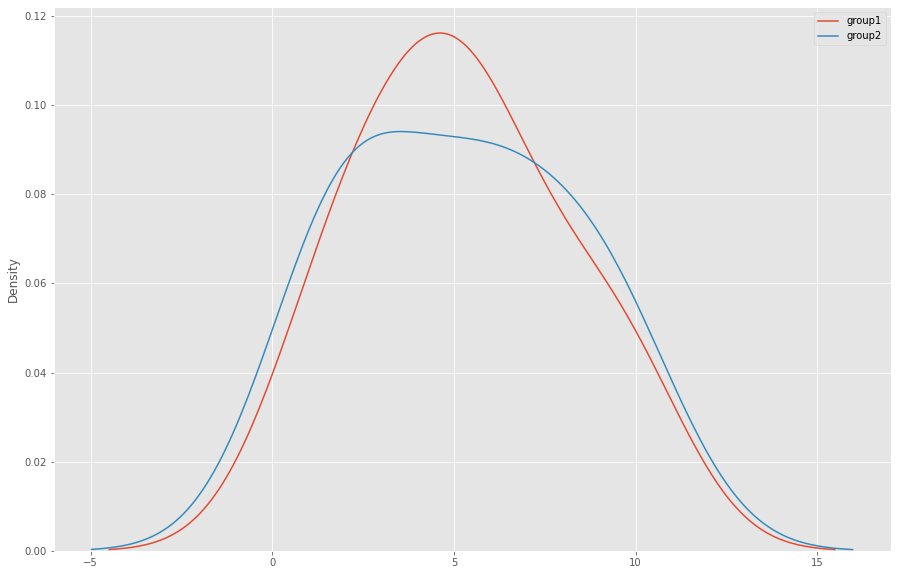

In [131]:
# Generating kdeplot for both groups
sns.kdeplot(group1, label='group1')
sns.kdeplot(group2, label='group2')

# Adding a legend
plt.legend()

<br>

<br>

Both samples seem to follow a normal distribution, lets check the variance.

<br>

In [133]:
# Checking variance
print(np.var(group1), np.var(group2))

7.56 8.959999999999999


<br>

As the ratio is less than 4, equal variance can be assumed.

<br>

In [134]:
# Two sample t-test
stats.ttest_ind(group1, group2, equal_var=True)

Ttest_indResult(statistic=0.0, pvalue=1.0)

<br>

As the p-value of the test (1.0) is greater the significance (0.05). The null hypothesis isn't rejected i.e we can't say the mean between both groups is different.  

<br>

<br>

### Paired T-Test

<br>

Otherwise known as a dependent sample t-test is used to compare the differences between a pair of dependent variables [33]. E.g. take a blood test before and after a treatment. 

A paired t-test is a “...one sample t-test on the differences between the two dependent variables” [35].


<br>

##### Assumptions

- Differences between dependent variables has a normal distribution (approx).
- Observations are independent.
- No major outliers.
- Dependent variables must be continuous [35].


<br>

<br>

##### Hypotheses

- Null hypothesis: No difference between both variables. 
- Alternative hypothesis: There is a difference between both variables (two-tailed or two-sided).
- Alternative hypothesis: The difference between both variables is < or > than 0 (one-tailed or one-sided) [33].


<br>

<br>

![img](images/paired_t-test.PNG)
 

<br>

<br>

In the below example, let's imagine a nurse has taken a blood test, pre and post proceedure 

![img](images/blood.png)

<br>

In [162]:
# Creating 2 arrays for example
pre_test = [77, 80, 84, 79, 91, 99, 80, 79, 87, 90]
post_test = [97, 76, 80, 79, 83, 90, 87, 74, 81, 77]

<br>

<br>

([<matplotlib.axis.XTick at 0x1b6fb0ad3a0>], [Text(1, 0, 'Post Test')])

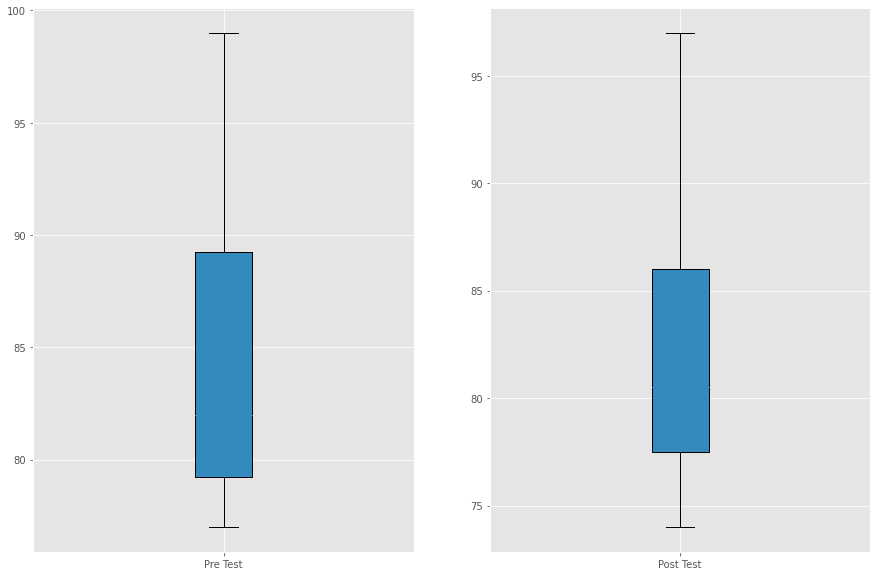

In [166]:
# Generating a subplot
plt.subplot()

# First subplot
plt.subplot(1,2,1)
plt.boxplot(pre_test, patch_artist=True)

# Adding tick to the x axis
plt.xticks([1], ['Pre Test'])


# Second subplot
plt.subplot(1,2,2)
plt.boxplot(post_test, patch_artist=True)

# Adding tick to the x axis
plt.xticks([1], ['Post Test'])


<br>

There are no major outliers in the data. Let's check for normaility.

<br>

<br>

In [168]:
# Checking for normaility
stats.shapiro(pre_test)

ShapiroResult(statistic=0.8913229703903198, pvalue=0.17548654973506927)

<br>

In [170]:
# Checking for normaility
stats.shapiro(post_test)

ShapiroResult(statistic=0.9267391562461853, pvalue=0.4165952205657959)

<br>

As the p-value is greater than 0.05, then the null hypothesis is not rejected i.e normally distributed.

<br>

<br>

<br>

In [86]:
# Paired t-test
stats.ttest_rel(pre_test, post_test)

Ttest_relResult(statistic=1.0395646569144328, pvalue=0.3256630765205558)

<br>

As the p-value of the test (0.3256) is less than alpha (0.05), the null hypothesis is rejected. i.e thr true mean is different for paitients pre and post treatment.

<br>

<br>

<br>

## T-Score
***

<br>

“Statistical tests generate a test statistic showing how far from the null hypothesis of the statistical test your data is. They then calculate a p-value that describes the likelihood of your data occurring if the null hypothesis were true” [36].

The test statistic for t-tests and regression tests is the t-score, also known as the t-value. It is the number of standard deviations from the mean of the t-distribution [36]. The T-score is usually taken from a t-table [link to one here](https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf).

The t-score formula lets you take an individual score and change it into a standardised form, which you can then use to compare scores [37]. The larger the difference is between the groups you are testing. 


<br>

***

<br>

<br>

<br>

***
***

## ANOVA
***

<br>

Analysis of Variance (ANOVA)  is a statistical inference test that lets you compare multiple groups at the same time. It is used to calculate the degree to which a dependent variable is influenced by one or more independent categorical variables [38]. 

A T-Test is used to compare the means of a condition between two groups, whereas ANOVA is used when we want to compare the means of a condition between more than two groups [39].

The output of the ANOVA formula, called the F statistic or  F-ratio. The F statistic  “...enables the analysis of the multiple sets of data in order to determine the variability among the samples and within samples” [39].


<br>

##### Assumptions

- The data follows normal distribution.
- The variance of data is the same for all groups.
- Data among groups is independent from each other.
- The dependent variable should be continuous 
- No significant outliers. 
- The independent variable should be made up of two or more categorical independent groups [38]. 



<br>

<br>

##### Hypothesis

- Null hypothesis: The statistical mean of all the groups/categories of the variables are equal.
- Alternate Hypothesis: The statistical mean of all the groups/categories of the variables are not equal [39].


<br>

<br>

##### Types of ANOVA

There are three types of ANOVA [39]:

1. One-Way ANOVA Test: Only one independent variable.
2. Two-Way ANOVA Test: There are two independent variables.
    - Replication: The two-way ANOVA test with Replication is carried out when two groups and the members of those groups are performing multiple tasks. E.g. vaccine for Coronavirus is still under development. Doctors are performing two different treatments in order to cure two groups of patients infected by the virus.
    - Without Replication: The two-way ANOVA test without Replication is carried out when we have only one group, and we are double-testing that same group. E.g  the vaccine has been developed successfully, and the researchers are testing one set of volunteers before and after they have been vaccinated in order to observe whether the vaccination is working properly or not.

3. n-Way ANOVA Test: There are more than two independent variables. 

<br>

<br>

#### Post ANOVA Test
***
<br>
The goal of the ANOVA test is to "...determine the statistically significant difference between the groups, if it is available. In case we find one, we will then have to test where the spot of group differences" [40].

As the results of an ANOVA don't identify which particular "...differences between pairs of means are significant" [41], to  decipher this we use post hoc tests "To explore differences between multiple group means while controlling the experiment-wise error rate" [40].

Examples of these tests include; the Bonferroni, Dunnet, Scheffe, and Turkey tests.

<br>

<br>

<br>

#### ANOVA Example
***

<br>

The dataset used in the following example was downloaded from [here](https://www.kaggle.com/alexandercox1234/3-diet-comparison?select=Diet_R.csv).

The data set Diet_R.csv contains information on 90 people who undertook one of three diets. There is background information such as age, gender (Female=0, Male=1) and height.

The aim of the study was to find which of the three diets was best for losing weight. Researcher's thought that the best diets for males and females may be different so the independent variables are diet and gender. 

<br>

The dataset consists of seven columns:

- Person: Code of the person
- gender: Female = 0, Male = 1
- Age  
- Height: Height in centimeters
- pre.weight: Pre diet weight
- Diet: Which diet the person is on (1, 2 or 3) 
- weight6weeks: Post diet weight 

<br>

<br>

![img](images/diet.webp)

<br>

<br>

<br>

### Loading Data and Exploration
***

<br>

In [171]:
# Importing the dataset
df = pd.read_csv('datasets/Diet_R.csv')

In [172]:
# Checking the data loaded
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,1,0,22,159,58,1,54.2
1,2,0,46,192,60,1,54.0
2,3,0,55,170,64,1,63.3
3,4,0,33,171,64,1,61.1
4,5,0,50,170,65,1,62.2
...,...,...,...,...,...,...,...
85,86,1,40,167,87,3,77.8
86,87,1,51,175,88,3,81.9
87,88,1,25,155,74,3,68.5
88,89,1,36,168,81,3,76.6


<br>

gender is binary variable which contains 0 for Female and 1 for Male.

<br>

<br>

In [172]:
# Checking the shape of the dataset
df.shape

(90, 7)

<br>

<br>

In [173]:
# Getting a general overview of the data
df.describe()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,45.500000,0.444444,39.077778,170.900000,72.533333,2.000000,68.715556
std,26.124701,0.499688,9.716461,11.145665,8.628669,0.821071,8.795784
min,1.000000,0.000000,16.000000,141.000000,58.000000,1.000000,53.000000
25%,23.250000,0.000000,33.000000,164.250000,66.000000,1.000000,61.650000
50%,45.500000,0.000000,39.000000,170.000000,72.000000,2.000000,68.800000
75%,67.750000,1.000000,45.750000,175.750000,79.000000,3.000000,75.025000
max,90.000000,1.000000,60.000000,201.000000,103.000000,3.000000,103.000000


<br>

<br>

<br>

In [169]:
# Getting an overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Person        90 non-null     int64  
 1   gender        90 non-null     int64  
 2   Age           90 non-null     int64  
 3   Height        90 non-null     int64  
 4   pre.weight    90 non-null     int64  
 5   Diet          90 non-null     int64  
 6   weight6weeks  90 non-null     float64
dtypes: float64(1), int64(6)
memory usage: 5.0 KB


<br>

<br>

<br>

In [173]:
# Checking for missing values
df.isnull().sum()

Person          0
gender          0
Age             0
Height          0
pre.weight      0
Diet            0
weight6weeks    0
dtype: int64

<br>

<br>

There are no missing values.

<br>

<br>

In [174]:
# Unique vaules for each diet i.e how many people per diet
df['Diet'].value_counts()

1    30
2    30
3    30
Name: Diet, dtype: int64

<br>

There is an equal amount of people on each diet.

<br>

<br>

In [177]:
# Unique vaules for gender i.e. how many females and males
df['gender'].value_counts()

0    50
1    40
Name: gender, dtype: int64

<br>

<br>

There are 50 women and 40 men participating.

<br>

<br>

<br>

In [195]:
# Getting stats per gender
df.groupby('gender').agg([np.mean, np.median, np.count_nonzero, np.std ]).weight6weeks

,mean,median,count_nonzero,std
gender,,,,
0,63.8460,62.30,50,8.113461
1,74.8025,74.85,40,5.044189


<br>

<br>

In [189]:
# Getting stats per gender and the correlating diet
df.groupby(['gender', 'Diet']).agg([np.mean, np.median, np.count_nonzero, np.std ]).weight6weeks

mean  median  count_nonzero        std
gender Diet                                             
0      1     64.258824    63.3             17   6.377603
       2     64.688235    62.0             17  11.518566
       3     62.512500    61.7             16   5.218924
1      1     76.530769    77.6             13   4.810472
       2     72.530769    72.7             13   5.309172
       3     75.307143    75.9             14   4.530998

<br>

<br>

There is a slight difference in weight on females in the diet - it doesn't seem to affect males

<br>

<br>

<br>

### Visualisation
***

<br>

<br>

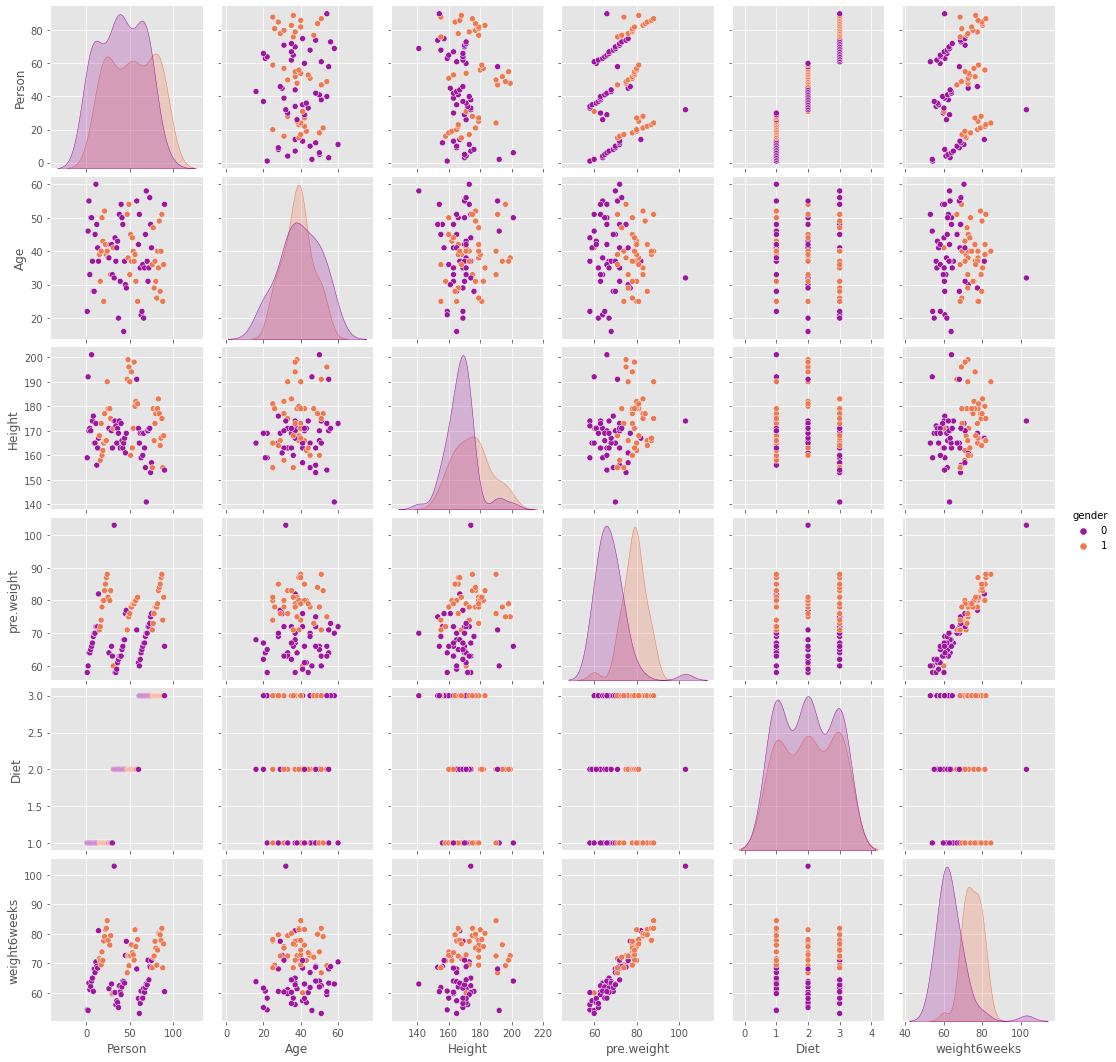

In [181]:
# Generating a pairplot 
sns.pairplot(df, hue='gender',palette='plasma')

<br>

<br>

<br>

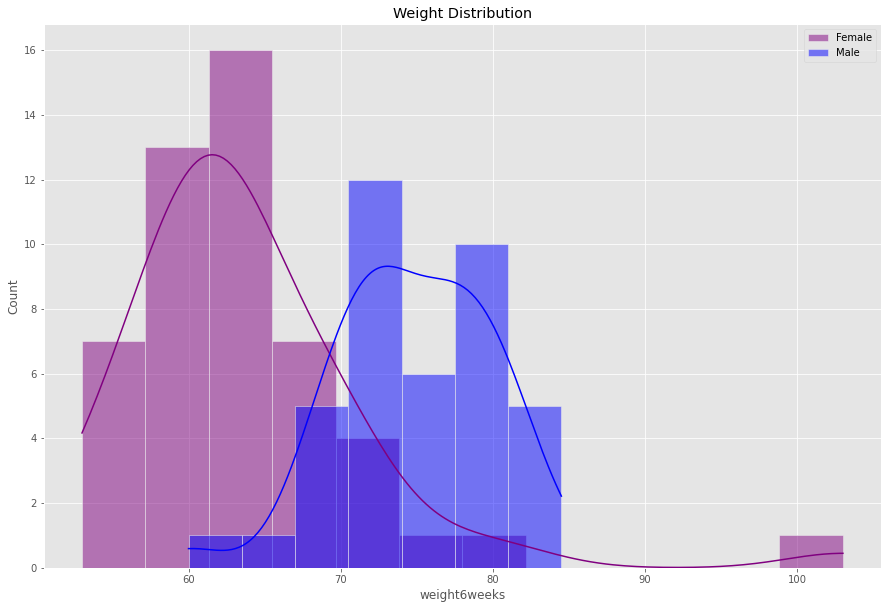

In [193]:
# Generating a histplot to see distribution of height by gender
sns.histplot(df[df.gender == 0].weight6weeks,  label='Female', color='purple', alpha=0.5, kde=True)
sns.histplot(df[df.gender == 1].weight6weeks,  label='Male', color='blue', alpha=0.5, kde=True)

# Adding a title
plt.title('Weight Distribution')

# Adding a legend
plt.legend()

<br>

<br>

<AxesSubplot:xlabel='Height', ylabel='pre.weight'>

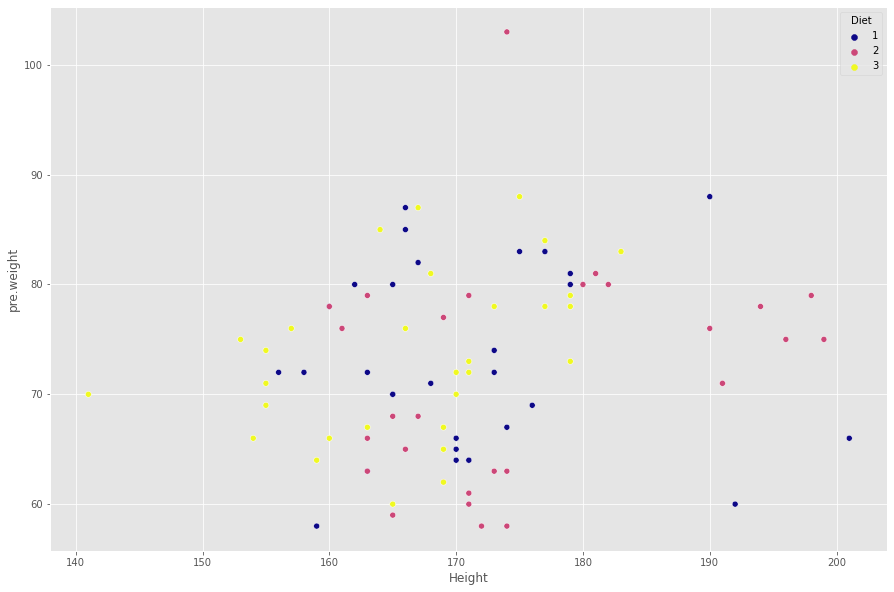

In [214]:
# Generating a scatterplot
sns.scatterplot(x=df['Height'], y=df['pre.weight'], hue=df['Diet'], palette='plasma')


<br>

<br>

<br>

In [230]:
# Checking height outlier
df[df['Height'] > 185]

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,BMI_start,BMI_end,BMI_change
1,2,0,46,192,60,1,54.0,16.276042,14.648438,1.627604
5,6,0,50,201,66,1,64.0,16.336229,15.841192,0.495037
23,24,1,40,190,88,1,84.5,24.376731,23.407202,0.969529
46,47,1,51,191,71,2,66.8,19.462186,18.310902,1.151284
47,48,1,38,199,75,2,72.6,18.938916,18.332870,0.606045
48,49,1,54,196,75,2,69.2,19.523115,18.013328,1.509788
49,50,1,33,190,76,2,72.5,21.052632,20.083102,0.969529
51,52,1,37,194,78,2,76.3,20.724838,20.273143,0.451695
54,55,1,37,198,79,2,71.1,20.151005,18.135904,2.015100
57,58,0,55,191,71,2,68.1,19.462186,18.667251,0.794934


<br>

<br>

We can see that there is one major outlier in this dataset - someone a lot taller than the others -  I will not delete this person as the results of the second diet is dependant on it and, it may be a real value.

<br>

<br>

### ANOVA Analysis - One Way
***

Hypot
H0: Diet 1, Diet 2 and Diet 3 affect weight loss equally. H1: Diet 1, Diet 2 and Diet 3

for this analysis we will create a new column for BMI (Body Mass Index) which will be the focal point of our ANOVA (dependent variable). The reasoning for this is weight often times decreases a lot more in people who carry more weight to begin with. BMI isn't a perfect measure for health but, I believe it to be the fairest for this purpose.

<br>

##### BMI Formula

BMI = weight (kilogramms) / height^2 (metres)

<br>

<br>

In [219]:
# Calculating BMI
df['BMI_start'] = df["pre.weight"] / (df ["Height"] / 100)**2
df["BMI_end"] = df["weight6weeks"] / (df["Height"] / 100)**2

# The main vaules we will be using
df["BMI_change"] = df['BMI_start'] - df["BMI_end"]

In [220]:
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,BMI_start,BMI_end,BMI_change
0,1,0,22,159,58,1,54.2,22.942130,21.439025,1.503105
1,2,0,46,192,60,1,54.0,16.276042,14.648438,1.627604
2,3,0,55,170,64,1,63.3,22.145329,21.903114,0.242215
3,4,0,33,171,64,1,61.1,21.887076,20.895318,0.991758
4,5,0,50,170,65,1,62.2,22.491349,21.522491,0.968858
...,...,...,...,...,...,...,...,...,...,...
85,86,1,40,167,87,3,77.8,31.195095,27.896303,3.298792
86,87,1,51,175,88,3,81.9,28.734694,26.742857,1.991837
87,88,1,25,155,74,3,68.5,30.801249,28.511967,2.289282
88,89,1,36,168,81,3,76.6,28.698980,27.140023,1.558957


<br>

<br>

#### Outliers

<br>

<AxesSubplot:xlabel='Diet', ylabel='BMI_change'>

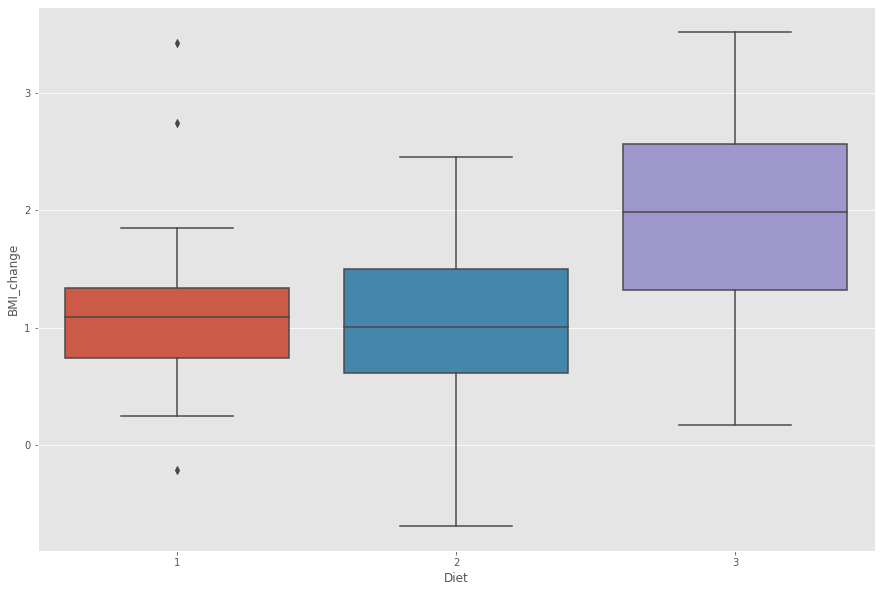

In [223]:
# Generating a boxplot for each diet 
sns.boxplot(x=df['Diet'], y=df['BMI_change'])

<br>

<br>

We have some outliers in first diet. 

"Outliers tend to increase the estimate of sample variance, thus decreasing the calculated F statistic for the ANOVA and lowering the chance of rejecting the null hypothesis. They may be due to recording errors, which may be correctable, or they may be due to the sample not being entirely from the same population" [41]. 

<br>

<br>

<br>

#### Normaility

<br>

<AxesSubplot:xlabel='BMI_change', ylabel='Count'>

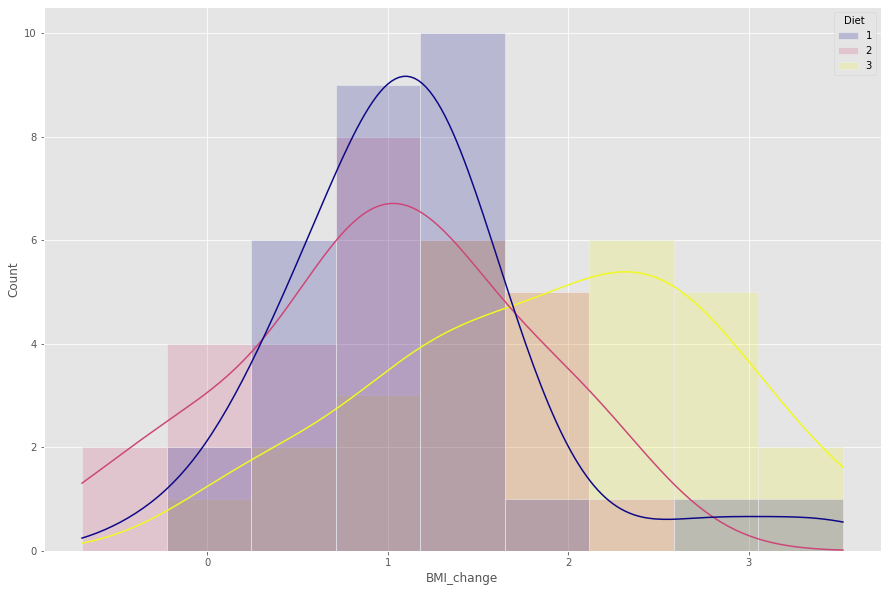

In [238]:
# KDEs of the three categories.
sns.histplot(hue=df['Diet'], x=df['BMI_change'], palette='plasma', alpha=0.2, kde=True)

<br>

<br>

<br>

<br>

In [231]:
# Getting BMI change for each diet in a list
diet_1 = df[df["Diet"] == 1]["BMI_change"].to_list()
diet_2 = df[df["Diet"] == 2]["BMI_change"].to_list()
diet_3 = df[df["Diet"] == 3]["BMI_change"].to_list()

<br>

<br>

<br>

In [241]:
stats.describe(diet_1)

DescribeResult(nobs=30, minmax=(-0.2125850340136033, 3.4293552812071333), mean=1.1330074891642345, variance=0.4969510179003984, skewness=1.226503815495184, kurtosis=2.7700817545177197)

In [ ]:
stats.anderson(diet_1)

AndersonResult(statistic=0.9341706661579181, critical_values=array([0.521, 0.593, 0.712, 0.83 , 0.988]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [233]:
stats.shapiro(diet_2)

ShapiroResult(statistic=0.9812564253807068, pvalue=0.8578926920890808)

In [234]:
stats.shapiro(diet_3)

ShapiroResult(statistic=0.9689876437187195, pvalue=0.5118600726127625)

<br>

<br>

In [216]:
# Getting mean
mean= df.BMI_change.mean()

In [217]:
mean

1.3413400888102005

In [218]:

diets = [diet_1, diet_2, diet_3]

# Sum of Squares
sst = 0

for diet in range(len(diets)):
    for square in range(len(diets[diet])):
        sst+=((diets[diet][square] - mean)**2)

In [219]:
sst

70.29681852815399

In [ ]:
# degree of freedom


In [226]:
# Homogeneity of Variances
stats.levene(diet_1, diet_2, diet_3)

LeveneResult(statistic=1.9463979922051824, pvalue=0.1489552599107222)

In [224]:
# Anova one way
stats.f_oneway(diet_1, diet_2, diet_3)

F_onewayResult(statistic=11.491246302710522, pvalue=3.728315951810503e-05)

p-value, i.e. the probability that under a true null hypothesis the F-statistic is not less than 11.49 is 0.0000372 or 0,0037%. As p<0.5, the  null hypothesis is rejected.

In [250]:
### Unequal Variance

def welch_anova_np(*args, var_equal=False):
    # https://svn.r-project.org/R/trunk/src/library/stats/R/oneway.test.R
    # translated from R Welch ANOVA (not assuming equal variance)

    F_onewayResult = co.namedtuple('F_onewayResult', ('statistic', 'pvalue'))

    args = [np.asarray(arg, dtype=float) for arg in args]
    k = len(args)
    ni = np.array([len(arg) for arg in args])
    mi = np.array([np.mean(arg) for arg in args])
    vi = np.array([np.var(arg,ddof=1) for arg in args])
    wi = ni/vi

    tmp =sum((1-wi/sum(wi))**2 / (ni-1))
    tmp /= (k**2 -1)

    dfbn = k - 1
    dfwn = 1 / (3 * tmp)

    m = sum(mi*wi) / sum(wi)
    f = sum(wi * (mi - m)**2) /((dfbn) * (1 + 2 * (dfbn - 1) * tmp))
    prob = spec.fdtrc(dfbn, dfwn, f)   # equivalent to stats.f.sf
    return F_onewayResult(f, prob)

For a one-way ANOVA, you will probably find that just two tests need to be considered. If your data met the assumption of homogeneity of variances, use Tukey's honestly significant difference (HSD) post hoc test. Note that if you use SPSS Statistics, Tukey's HSD test is simply referred to as "Tukey" in the post hoc multiple comparisons dialogue box). If your data did not meet the homogeneity of variances assumption, you should consider running the Games Howell post hoc test.

In [251]:
# Perform the test.
welch_anova_np(diet_1, diet_2, diet_3)

F_onewayResult(statistic=9.95137700559396, pvalue=0.0001945692037522187)

In [252]:
stats.tukeylambda

***

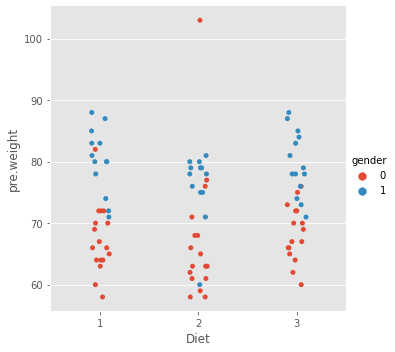

In [191]:
sns.catplot(x="Diet", y="pre.weight", hue='gender', data=df)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c8d20600d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c8d2060820>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c8d2052d30>],
 'medians': [<matplotlib.lines.Line2D at 0x1c8d2060f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c8d206a310>],
 'means': []}

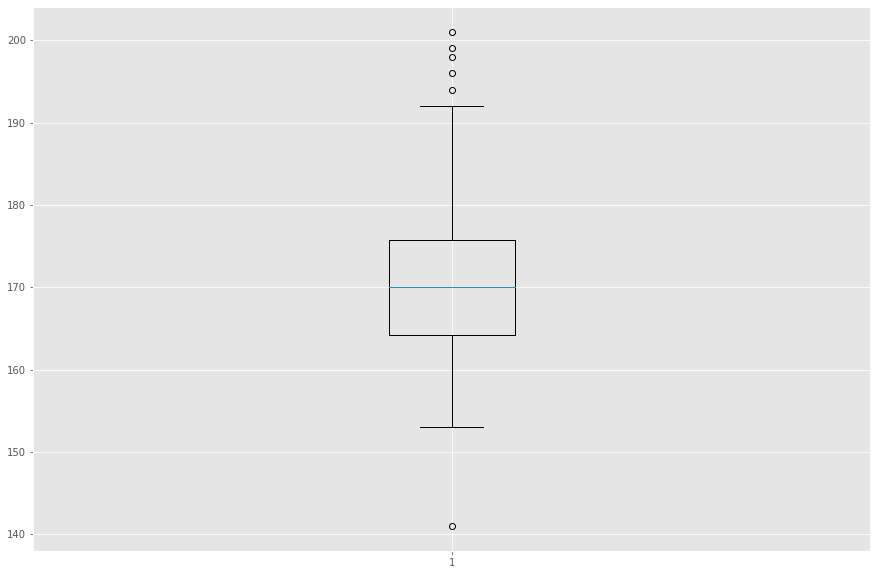

In [199]:
plt.boxplot(df['Height'])

<AxesSubplot:xlabel='Diet', ylabel='weight6weeks'>

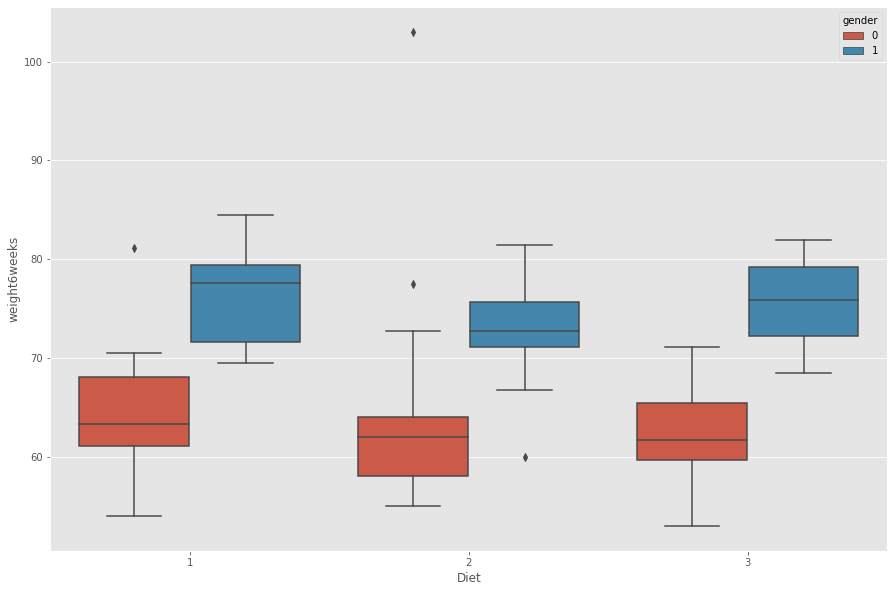

In [192]:
sns.boxplot(x="Diet", y="weight6weeks", hue='gender', data=df)

In [243]:
corr = df.corr()

In [244]:
corr

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,BMI_start,BMI_end,BMI_change
Person,1.000000,0.234115,-0.087753,-0.088270,0.226592,0.942867,0.132736,0.243232,0.173359,0.349761
gender,0.234115,1.000000,-0.055798,0.312707,0.642803,0.027386,0.622438,0.231363,0.254318,-0.042388
Age,-0.087753,-0.055798,1.000000,0.091167,-0.049014,-0.101404,-0.033487,-0.070203,-0.065552,-0.035865
Height,-0.088270,0.312707,0.091167,1.000000,0.179664,-0.160840,0.215716,-0.666952,-0.619729,-0.353468
pre.weight,0.226592,0.642803,-0.049014,0.179664,1.000000,0.036477,0.962207,0.601426,0.627380,0.031249
Diet,0.942867,0.027386,-0.101404,-0.160840,0.036477,1.000000,-0.051030,0.159800,0.083524,0.357180
weight6weeks,0.132736,0.622438,-0.033487,0.215716,0.962207,-0.051030,1.000000,0.537110,0.622681,-0.233805
BMI_start,0.243232,0.231363,-0.070203,-0.666952,0.601426,0.159800,0.537110,1.000000,0.974539,0.339776
BMI_end,0.173359,0.254318,-0.065552,-0.619729,0.627380,0.083524,0.622681,0.974539,1.000000,0.120248
BMI_change,0.349761,-0.042388,-0.035865,-0.353468,0.031249,0.357180,-0.233805,0.339776,0.120248,1.000000


<AxesSubplot:>

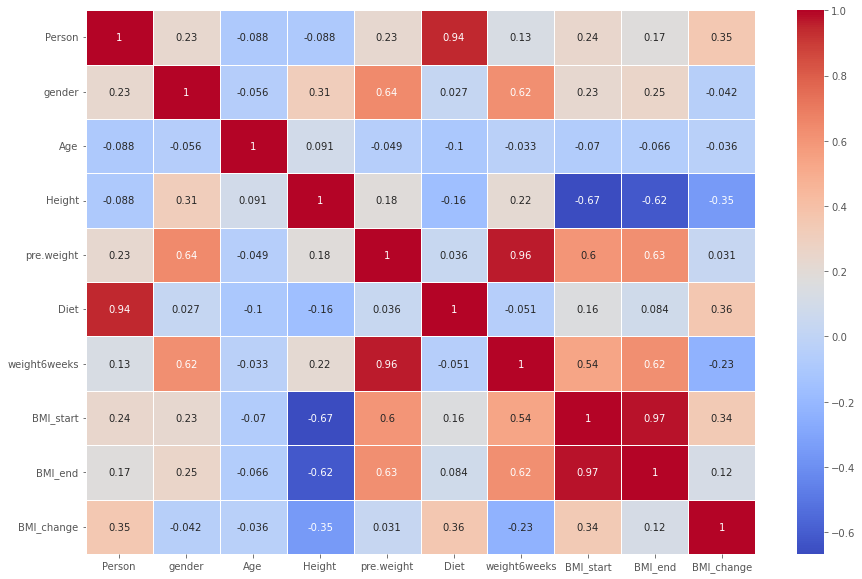

In [245]:
sns.heatmap(corr, linecolor='white', linewidths=1, cmap='coolwarm', annot=True)

***

## References

***

[1]	What is NumPy? — NumPy v1.21 Manual [Internet]. Numpy.org. [cited 2021 Oct 19]. Available from: https://numpy.org/doc/stable/user/whatisnumpy.html
 	 
[2]	Pajankar A. Introduction to NumPy. In: Raspberry Pi Supercomputing and Scientific Programming. Berkeley, CA: Apress; 2017. p. 109–28.
 	 
[3]	Bisong E. NumPy. In: Building Machine Learning and Deep Learning Models on Google Cloud Platform. Berkeley, CA: Apress; 2019. p. 91–113.
 	 
[4]	Python R. NumPy tutorial: Your first steps into data science in Python [Internet]. Realpython.com. Real Python; 2021 [cited 2021 Oct 19]. Available from: https://realpython.com/numpy-tutorial/
 	 
[5]	Wikipedia contributors. Applications of randomness [Internet]. Wikipedia, The Free Encyclopedia. 2021 [cited 2021 Oct 19]. Available from: https://en.wikipedia.org/w/index.php?title=Applications_of_randomness&oldid=1016893073
 	 
[6]	Random Numbers in NumPy [Internet]. W3schools.com. [cited 2021 Oct 19]. Available from: https://www.w3schools.com/python/numpy/numpy_random.asp
 	 
[7]	McKinney W. Python for Data Analysis: Data wrangling with pandas, NumPy, and IPython. Sebastopol, CA: O’Reilly Media; 2012.
 	 
[8]	Differences between numpy.random.rand vs numpy.random.randn in Python [Internet]. Stackoverflow.com. [cited 2021 Oct 19]. Available from: https://stackoverflow.com/questions/47240308/differences-between-numpy-random-rand-vs-numpy-random-randn-in-python
 	 
[9]	Lohana A. NumPy Random Choice: How to use it? [Internet]. Codeleaks.io. 2021 [cited 2021 Oct 19]. Available from: https://www.codeleaks.io/numpy-random-choice-python/
 	 
[10]	Wikipedia contributors. Permutation [Internet]. Wikipedia, The Free Encyclopedia. 2021 [cited 2021 Oct 19]. Available from: https://en.wikipedia.org/w/index.php?title=Permutation&oldid=1050569920
 	 
[11]	Ranganathan P, Gogtay NJ. An Introduction to Statistics - Data Types, distributions and Summarizing Data. Indian J Crit Care Med. 2019;23(Suppl 2):S169–70.
 	 
[12]	M SL, T TM, F HS, editors. Poisson Distribution. Betascript Publishing; 2013.
 	 
[13]	Koehrsen W. The Poisson distribution and Poisson process explained [Internet]. Towards Data Science. 2019 [cited 2021 Oct 19]. Available from: https://towardsdatascience.com/the-poisson-distribution-and-poisson-process-explained-4e2cb17d459
 	 
[14]	Diving into python’s numpy random Poisson [Internet]. Pythonpool.com. 2021 [cited 2021 Oct 19]. Available from: https://www.pythonpool.com/numpy-random-poisson/
 	 
[15]	Binomial Distribution: Formula, What it is, How to use it [Internet]. Statisticshowto.com. 2018 [cited 2021 Oct 19]. Available from: https://www.statisticshowto.com/probability-and-statistics/binomial-theorem/binomial-distribution-formula/
 	 
[16]	Python - Binomial Distribution - GeeksforGeeks [Internet]. Geeksforgeeks.org. 2020 [cited 2021 Oct 19]. Available from: https://www.geeksforgeeks.org/python-binomial-distribution/
 	 
[17]	How to Graph the Binomial Distribution - dummies [Internet]. Dummies.com. 2016 [cited 2021 Oct 19]. Available from: https://www.dummies.com/education/math/business-statistics/how-to-graph-the-binomial-distribution/
 	 
[18]	Surbhi S. Difference between binomial and Poisson distribution [Internet]. Keydifferences.com. 2016 [cited 2021 Oct 19]. Available from: https://keydifferences.com/difference-between-binomial-and-poisson-distribution.html
 	 
[19]	Chen J. Uniform Distribution [Internet]. Investopedia.com. 2021 [cited 2021 Oct 19]. Available from: https://www.investopedia.com/terms/u/uniform-distribution.asp
 	 
[20]	Parametric continuous distributions [Internet]. Analytica.com. [cited 2021 Oct 19]. Available from: http://wiki.analytica.com/Parametric_continuous_distributions
 	 
[21]	Uniform distribution [Internet]. Corporatefinanceinstitute.com. 2020 [cited 2021 Oct 19]. Available from: https://corporatefinanceinstitute.com/resources/knowledge/other/uniform-distribution/
 	 
[22]	numpy.random.uniform — NumPy v1.16 Manual [Internet]. Numpy.org. [cited 2021 Oct 19]. Available from: https://numpy.org/doc/1.16/reference/generated/numpy.random.uniform.html
 	 
[23]	Wikipedia contributors. Normal distribution [Internet]. Wikipedia, The Free Encyclopedia. 2021 [cited 2021 Oct 19]. Available from: https://en.wikipedia.org/w/index.php?title=Normal_distribution&oldid=1049556144
 	 
[24]	Chen J. Normal Distribution [Internet]. Investopedia.com. 2021 [cited 2021 Oct 19]. Available from: https://www.investopedia.com/terms/n/normaldistribution.asp
 	 
[25]	Patel JK, B. C. Handbook of the normal distribution, second edition. 2nd ed. Boca Raton, FL: CRC Press; 1996.
 	 
[26]	Kissell R, Poserina J. Advanced Math and Statistics. In: Optimal Sports Math, Statistics, and Fantasy. Elsevier; 2017. p. 103–35.
 	 
[27]	ReliaSoft Publishing. Overview of the Gumbel, Logistic, Loglogistic and Gumbel distributions [Internet]. Weibull.com. [cited 2021 Oct 19]. Available from: https://www.weibull.com/hotwire/issue56/relbasics56.htm
 	 
[28]	Stephanie. Logistic distribution [Internet]. Statisticshowto.com. 2016 [cited 2021 Oct 19]. Available from: https://www.statisticshowto.com/logistic-distribution/
 	 
[29]	Logistic Distribution [Internet]. W3schools.com. [cited 2021 Oct 19]. Available from: https://www.w3schools.com/python/numpy/numpy_random_logistic.asp
 	 
[30]	Ebner J. NumPy random seed, explained [Internet]. Sharpsightlabs.com. 2019 [cited 2021 Oct 19]. Available from: https://www.sharpsightlabs.com/blog/numpy-random-seed/
 	 
[31]	Pseudo random number generator (PRNG) [Internet]. Geeksforgeeks.org. 2017 [cited 2021 Oct 19]. Available from: https://www.geeksforgeeks.org/pseudo-random-number-generator-prng/
 	 
[32]	Vajargah BF, Asghari R. A novel pseudo-random number generator for cryptographic applications. Indian J Sci Technol. 2016;9(6):1–5.
 	 
[33]	Permuted Congruential Generator (64-bit, PCG64) — NumPy v1.21 Manual [Internet]. Numpy.org. [cited 2021 Oct 19]. Available from: https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html
 	 
[34]	Wikipedia contributors. Permuted congruential generator [Internet]. Wikipedia, The Free Encyclopedia. 2021 [cited 2021 Oct 19]. Available from: https://en.wikipedia.org/w/index.php?title=Permuted_congruential_generator&oldid=999160939
 	 
[35]	Shema M. Seven deadliest web application attacks [Internet]. Syngress Publishing; 2010 [cited 2021 Oct 20]. Available from: https://www.sciencedirect.com/book/9781597495431/seven-deadliest-web-application-attacks
 	 
[36]	Wikipedia contributors. Mersenne Twister [Internet]. Wikipedia, The Free Encyclopedia. 2021 [cited 2021 Oct 20]. Available from: https://en.wikipedia.org/w/index.php?title=Mersenne_Twister&oldid=1049043226
 	 
[37]	Random sampling (numpy.random) — NumPy v1.18 Manual [Internet]. Numpy.org. [cited 2021 Oct 20]. Available from: https://numpy.org/doc/1.18/reference/random/index.html
 	 
[38]	Random Generator — NumPy v1.18 Manual [Internet]. Numpy.org. [cited 2021 Oct 20]. Available from: https://numpy.org/doc/1.18/reference/random/generator.html
 	 
[39]	Bedre R. Perform three types of t-test in Python [Internet]. Reneshbedre.com. 2019 [cited 2021 Nov 17]. Available from: https://www.reneshbedre.com/blog/ttest.html
 	 

 	 


### Images

- [Scipy Logo](https://image.pngaaa.com/125/1971125-small.png)
- [Coin](https://www.google.com/url?sa=i&url=https%3A%2F%2Ffree3d.com%2F3d-model%2F2-euro-coin-italy-4150.html&psig=AOvVaw3914ZDmMJJRuMCZL_bZdBl&ust=1634761631572000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCPjQmeen1_MCFQAAAAAdAAAAABAL)
- [T-Test](https://datatab.net/assets/tutorial/one_Sample_t-Test.png)
- [P-value](https://www.simplypsychology.org/p-value.png?ezimgfmt=ng%3Awebp%2Fngcb30%2Frs%3Adevice%2Frscb30-1)
- [T-Test One](https://datatab.net/assets/tutorial/einseitigZweiseitig_en_new.png)
- [T-Test Two](https://datatab.net/assets/tutorial/t-test-for-independent-samples-homogene-variance.png)
- [Paired T-Test](https://d138zd1ktt9iqe.cloudfront.net/media/seo_landing_files/paired-t-test-formula-1-1621582339.png)
- [Blood Test](https://www.vexels.com/png-svg/preview/208627/blood-test-tube-badge)
- [Anova Equation](https://static.javatpoint.com/python/images/anova-test-in-python.png)
- [Equal Vairance](https://datatab.net/assets/tutorial/t-test-for-independent-samples-homogene-variance.png)
- [Unequal Variance](https://datatab.net/assets/tutorial/t-test-for-independent-samples-heterogeneous-variance.png)
- [Diet](https://iconscout.com/icon/diet-plan-2054970)


# End